In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/content/patient_dataset.csv')
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=21, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=21, max_depth=3)
dt.fit(X_train, y_train)

print(classification_report(dt.predict(X_train), y_train))
print(classification_report(dt.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       437
           1       0.60      0.73      0.66       177

    accuracy                           0.78       614
   macro avg       0.74      0.77      0.75       614
weighted avg       0.80      0.78      0.79       614

              precision    recall  f1-score   support

           0       0.90      0.76      0.83       118
           1       0.48      0.72      0.58        36

    accuracy                           0.75       154
   macro avg       0.69      0.74      0.70       154
weighted avg       0.80      0.75      0.77       154



In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# from sklearn.tree import plot_tree, export_graphviz
# import graphviz
# from six import StringIO

# dot_data = StringIO()
# dot_data = export_graphviz(dt, out_file='Tree.jpg')
# graph = graphviz.Source(dot_data)
# graph

# # plot_tree(dt)

In [ ]:
# from sklearn.tree import export_graphviz
# from IPython.display import Image
# import pydotplus
# from six import StringIO

# dot_data = StringIO()
# export_graphviz(dt, out_file=dot_data)
# pydotplus.graph_from_dot_data(dot_data.get_values())

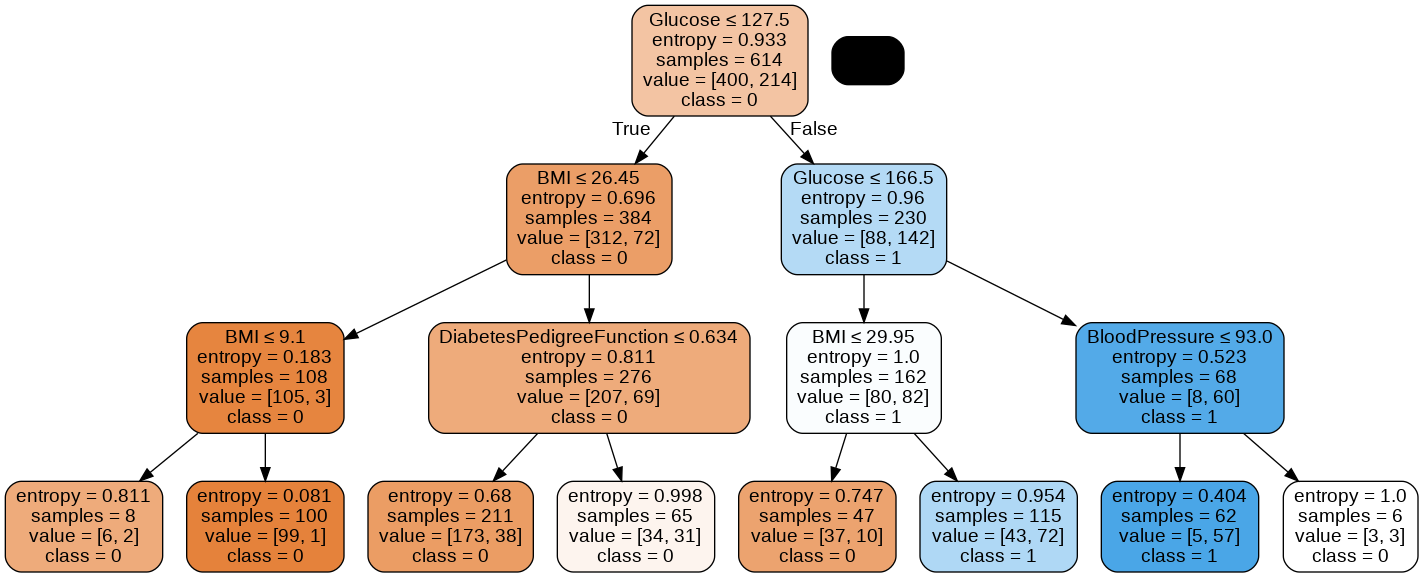

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dot_data = StringIO()

export_graphviz(dt,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1']
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_model_DT.png')
Image(graph.create_png())

In [ ]:
dot_data.get_values()

AttributeError: ignored

In [ ]:
export_graphviz(dt)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="X[1] <= 139.5\\ngini = 0.454\\nsamples = 614\\nvalue = [400, 214]"] ;\n1 [label="X[5] <= 27.35\\ngini = 0.347\\nsamples = 452\\nvalue = [351, 101]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[1] <= 105.5\\ngini = 0.096\\nsamples = 139\\nvalue = [132, 7]"] ;\n1 -> 2 ;\n3 [label="gini = 0.0\\nsamples = 73\\nvalue = [73, 0]"] ;\n2 -> 3 ;\n4 [label="X[5] <= 10.4\\ngini = 0.19\\nsamples = 66\\nvalue = [59, 7]"] ;\n2 -> 4 ;\n5 [label="X[0] <= 7.0\\ngini = 0.48\\nsamples = 5\\nvalue = [3, 2]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0]"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]"] ;\n5 -> 7 ;\n8 [label="X[6] <= 0.257\\ngini = 0.15\\nsamples = 61\\nvalue = [56, 5]"] ;\n4 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 25\\nvalue = [25, 0]"] ;\n8 -> 9 ;\n10 [label="X[6] <= 0.302\\ngini = 0.239\\nsamples = 36\\nvalue = [31, 5

_io.StringIO